In [1]:
import pandas as pd

# Loading data
df = pd.read_csv("/content/StudentsPerformance.csv")

# Removing duplicate rows
df = df.drop_duplicates()

# Handling missing values (fill with mode)
for col in df.columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Saving cleaned file
df.to_csv("StudentsPerformance_cleaned.csv", index=False)

df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("StudentsPerformance.csv")

# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

# Apply Label Encoding to each categorical column
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Save the encoded dataset
df.to_csv("students_performance_label_encoded.csv", index=False)

print("Label Encoding completed!")
print("Encoded columns:", list(cat_cols))


Label Encoding completed!
Encoded columns: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


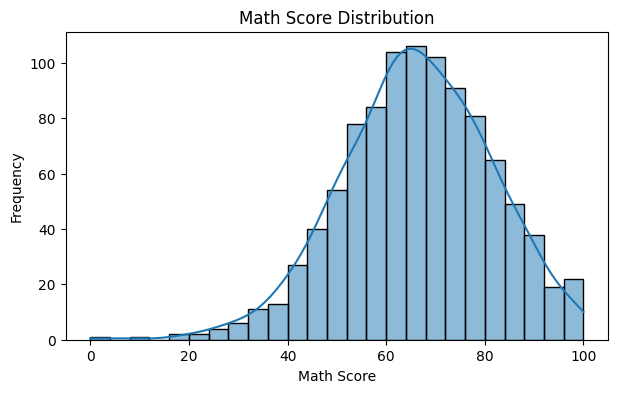

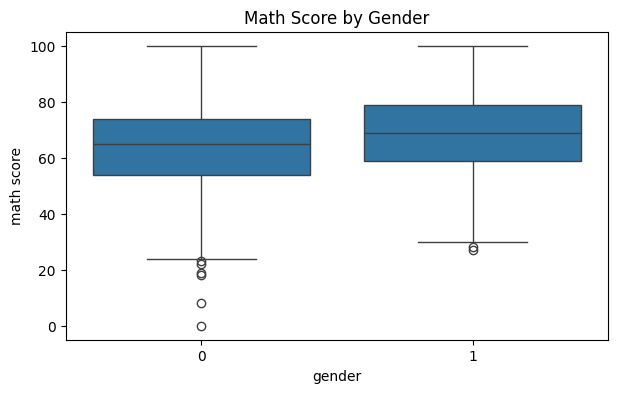

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histogram
# -----------------------------
plt.figure(figsize=(7,4))
sns.histplot(df['math score'], kde=True)
plt.title("Math Score Distribution")
plt.xlabel("Math Score")
plt.ylabel("Frequency")
plt.show()

# 2. Boxplot
# -----------------------------
plt.figure(figsize=(7,4))
sns.boxplot(x='gender', y='math score', data=df)
plt.title("Math Score by Gender")
plt.show()

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [6]:
# Separate Features & Target

X = df.drop(columns=['math score'])
y = df['math score']

print(X,y)

X = pd.get_dummies(X, drop_first=True)

print(X)


     gender  race/ethnicity  parental level of education  lunch  \
0         0               1                            1      1   
1         0               2                            4      1   
2         0               1                            3      1   
3         1               0                            0      0   
4         1               2                            4      1   
..      ...             ...                          ...    ...   
995       0               4                            3      1   
996       1               2                            2      0   
997       0               2                            2      0   
998       0               3                            4      1   
999       0               3                            4      0   

     test preparation course  reading score  writing score  
0                          1             72             74  
1                          0             90             88  
2           

In [12]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

linreg = LinearRegression()
linreg.fit(X_train, y_train)



LinearRegression()

In [14]:
# making prediction

y_pred = linreg.predict(X_test)
y_pred


array([78.22729746, 69.88782876, 65.54913882, 54.78174727, 51.21026793,
       61.13549219, 80.72352618, 67.52622877, 81.21948127, 73.22507756,
       62.2567038 , 60.33753674, 70.33990018, 53.59428373, 64.56172027,
       59.71965839, 47.69805535, 66.04747346, 66.2759456 , 49.14796662,
       72.40516913, 69.86566213, 71.44985266, 77.59243506, 62.06588696,
       68.33151644, 93.27821367, 55.51628026, 56.20550762, 86.27153693,
       57.2009608 , 64.28243637, 52.94420485, 73.52670636, 64.5411249 ,
       85.09761051, 70.1497571 , 54.8457141 , 73.44233029, 65.72672117,
       65.50733863, 80.26244318, 57.41544004, 78.30094999, 92.60858016,
       79.78531552, 47.08444625, 73.14495449, 75.11146255, 50.06292522,
       61.03682353, 60.7957046 , 64.6070472 , 56.66007634, 74.50011689,
       70.01192772, 68.53340486, 66.31982309, 64.65380375, 62.36543845,
       68.89351566, 45.86414814, 49.78672417, 78.25433873, 45.0739001 ,
       86.90169674, 67.17235606, 75.73898651, 91.40444192, 44.14

In [21]:
# comparing predicted values with actual values

comparison = pd.DataFrame({"Actual Values": y_test,"Predicted Values": y_pred})

comparison.head()

,Actual Values,Predicted Values
316,77,78.227297
459,72,69.887829
854,62,65.549139
11,40,54.781747
978,55,51.210268


In [17]:
# model evaluation

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)


MAE: 4.509643746462107
RMSE: 5.644534789445339
R2 Score: 0.8436847075898838
